## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 0.01

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.036765


0:	learn: 0.9793830	total: 47.8ms	remaining: 47.8s
1:	learn: 0.9582303	total: 48.8ms	remaining: 24.4s
2:	learn: 0.9353695	total: 49.7ms	remaining: 16.5s
3:	learn: 0.9161608	total: 50.9ms	remaining: 12.7s
4:	learn: 0.8990488	total: 51.7ms	remaining: 10.3s
5:	learn: 0.8832373	total: 52.7ms	remaining: 8.72s
6:	learn: 0.8650817	total: 53.5ms	remaining: 7.59s
7:	learn: 0.8477194	total: 54.3ms	remaining: 6.73s
8:	learn: 0.8311338	total: 55.1ms	remaining: 6.07s
9:	learn: 0.8132347	total: 55.9ms	remaining: 5.54s
10:	learn: 0.7953546	total: 56.8ms	remaining: 5.1s
11:	learn: 0.7796915	total: 57.6ms	remaining: 4.74s
12:	learn: 0.7641617	total: 58.4ms	remaining: 4.43s
13:	learn: 0.7484061	total: 59.3ms	remaining: 4.17s
14:	learn: 0.7353909	total: 60.1ms	remaining: 3.95s
15:	learn: 0.7199546	total: 60.9ms	remaining: 3.75s
16:	learn: 0.7058790	total: 61.8ms	remaining: 3.57s
17:	learn: 0.6928959	total: 62.6ms	remaining: 3.41s
18:	learn: 0.6802797	total: 63.3ms	remaining: 3.27s
19:	learn: 0.6666222	to

120:	learn: 0.2732505	total: 148ms	remaining: 1.07s
121:	learn: 0.2722779	total: 149ms	remaining: 1.07s
122:	learn: 0.2706818	total: 149ms	remaining: 1.06s
123:	learn: 0.2699505	total: 150ms	remaining: 1.06s
124:	learn: 0.2691699	total: 151ms	remaining: 1.06s
125:	learn: 0.2678759	total: 152ms	remaining: 1.05s
126:	learn: 0.2667829	total: 153ms	remaining: 1.05s
127:	learn: 0.2658124	total: 154ms	remaining: 1.05s
128:	learn: 0.2648855	total: 155ms	remaining: 1.04s
129:	learn: 0.2641466	total: 155ms	remaining: 1.04s
130:	learn: 0.2633410	total: 156ms	remaining: 1.04s
131:	learn: 0.2621334	total: 157ms	remaining: 1.03s
132:	learn: 0.2614823	total: 158ms	remaining: 1.03s
133:	learn: 0.2601560	total: 159ms	remaining: 1.03s
134:	learn: 0.2595334	total: 160ms	remaining: 1.02s
135:	learn: 0.2587113	total: 160ms	remaining: 1.02s
136:	learn: 0.2582149	total: 161ms	remaining: 1.02s
137:	learn: 0.2573688	total: 162ms	remaining: 1.01s
138:	learn: 0.2562682	total: 163ms	remaining: 1.01s
139:	learn: 

166:	learn: 0.2363036	total: 186ms	remaining: 927ms
167:	learn: 0.2355500	total: 188ms	remaining: 930ms
168:	learn: 0.2349215	total: 189ms	remaining: 929ms
169:	learn: 0.2341849	total: 190ms	remaining: 926ms
170:	learn: 0.2335247	total: 191ms	remaining: 925ms
171:	learn: 0.2330065	total: 192ms	remaining: 922ms
172:	learn: 0.2326195	total: 192ms	remaining: 920ms
173:	learn: 0.2319223	total: 193ms	remaining: 917ms
174:	learn: 0.2313989	total: 194ms	remaining: 915ms
175:	learn: 0.2306230	total: 195ms	remaining: 912ms
176:	learn: 0.2299509	total: 196ms	remaining: 910ms
177:	learn: 0.2293964	total: 196ms	remaining: 907ms
178:	learn: 0.2288240	total: 197ms	remaining: 905ms
179:	learn: 0.2283193	total: 198ms	remaining: 903ms
180:	learn: 0.2276200	total: 199ms	remaining: 900ms
181:	learn: 0.2270094	total: 200ms	remaining: 898ms
182:	learn: 0.2265258	total: 201ms	remaining: 896ms
183:	learn: 0.2260137	total: 201ms	remaining: 893ms
184:	learn: 0.2256783	total: 202ms	remaining: 892ms
185:	learn: 

284:	learn: 0.1785633	total: 288ms	remaining: 722ms
285:	learn: 0.1781925	total: 289ms	remaining: 720ms
286:	learn: 0.1777819	total: 289ms	remaining: 719ms
287:	learn: 0.1773282	total: 290ms	remaining: 718ms
288:	learn: 0.1769502	total: 291ms	remaining: 716ms
289:	learn: 0.1766256	total: 292ms	remaining: 715ms
290:	learn: 0.1762818	total: 293ms	remaining: 713ms
291:	learn: 0.1759812	total: 294ms	remaining: 712ms
292:	learn: 0.1756654	total: 294ms	remaining: 711ms
293:	learn: 0.1753518	total: 295ms	remaining: 709ms
294:	learn: 0.1750510	total: 296ms	remaining: 708ms
295:	learn: 0.1746660	total: 297ms	remaining: 706ms
296:	learn: 0.1743698	total: 298ms	remaining: 705ms
297:	learn: 0.1741036	total: 298ms	remaining: 703ms
298:	learn: 0.1738863	total: 299ms	remaining: 702ms
299:	learn: 0.1735892	total: 300ms	remaining: 700ms
300:	learn: 0.1731943	total: 301ms	remaining: 699ms
301:	learn: 0.1728469	total: 302ms	remaining: 698ms
302:	learn: 0.1724301	total: 303ms	remaining: 696ms
303:	learn: 

331:	learn: 0.1624494	total: 327ms	remaining: 657ms
332:	learn: 0.1620981	total: 328ms	remaining: 656ms
333:	learn: 0.1618328	total: 329ms	remaining: 655ms
334:	learn: 0.1614792	total: 329ms	remaining: 654ms
335:	learn: 0.1611670	total: 330ms	remaining: 653ms
336:	learn: 0.1607130	total: 331ms	remaining: 651ms
337:	learn: 0.1604204	total: 332ms	remaining: 650ms
338:	learn: 0.1601258	total: 333ms	remaining: 649ms
339:	learn: 0.1598547	total: 333ms	remaining: 647ms
340:	learn: 0.1595338	total: 334ms	remaining: 646ms
341:	learn: 0.1591560	total: 335ms	remaining: 645ms
342:	learn: 0.1588241	total: 336ms	remaining: 644ms
343:	learn: 0.1584322	total: 337ms	remaining: 642ms
344:	learn: 0.1581554	total: 338ms	remaining: 641ms
345:	learn: 0.1579230	total: 338ms	remaining: 640ms
346:	learn: 0.1576617	total: 339ms	remaining: 638ms
347:	learn: 0.1574751	total: 340ms	remaining: 637ms
348:	learn: 0.1571365	total: 341ms	remaining: 636ms
349:	learn: 0.1570629	total: 342ms	remaining: 635ms
350:	learn: 

448:	learn: 0.1334275	total: 425ms	remaining: 521ms
449:	learn: 0.1332987	total: 426ms	remaining: 521ms
450:	learn: 0.1331067	total: 427ms	remaining: 520ms
451:	learn: 0.1328279	total: 428ms	remaining: 519ms
452:	learn: 0.1325780	total: 429ms	remaining: 517ms
453:	learn: 0.1323446	total: 429ms	remaining: 516ms
454:	learn: 0.1320852	total: 430ms	remaining: 515ms
455:	learn: 0.1318339	total: 431ms	remaining: 514ms
456:	learn: 0.1315433	total: 432ms	remaining: 513ms
457:	learn: 0.1313653	total: 433ms	remaining: 512ms
458:	learn: 0.1311582	total: 434ms	remaining: 511ms
459:	learn: 0.1311057	total: 435ms	remaining: 510ms
460:	learn: 0.1308018	total: 435ms	remaining: 509ms
461:	learn: 0.1305158	total: 436ms	remaining: 508ms
462:	learn: 0.1303462	total: 437ms	remaining: 507ms
463:	learn: 0.1302185	total: 438ms	remaining: 506ms
464:	learn: 0.1299137	total: 439ms	remaining: 505ms
465:	learn: 0.1297525	total: 440ms	remaining: 504ms
466:	learn: 0.1295942	total: 441ms	remaining: 503ms
467:	learn: 

495:	learn: 0.1238442	total: 464ms	remaining: 471ms
496:	learn: 0.1235879	total: 465ms	remaining: 471ms
497:	learn: 0.1234208	total: 466ms	remaining: 470ms
498:	learn: 0.1231217	total: 467ms	remaining: 469ms
499:	learn: 0.1229870	total: 468ms	remaining: 468ms
500:	learn: 0.1227567	total: 468ms	remaining: 466ms
501:	learn: 0.1226643	total: 469ms	remaining: 465ms
502:	learn: 0.1224801	total: 470ms	remaining: 464ms
503:	learn: 0.1223190	total: 471ms	remaining: 463ms
504:	learn: 0.1221077	total: 472ms	remaining: 462ms
505:	learn: 0.1219576	total: 473ms	remaining: 461ms
506:	learn: 0.1218548	total: 473ms	remaining: 460ms
507:	learn: 0.1216641	total: 474ms	remaining: 459ms
508:	learn: 0.1214343	total: 475ms	remaining: 458ms
509:	learn: 0.1212732	total: 476ms	remaining: 457ms
510:	learn: 0.1211052	total: 477ms	remaining: 456ms
511:	learn: 0.1208910	total: 478ms	remaining: 455ms
512:	learn: 0.1205847	total: 479ms	remaining: 454ms
513:	learn: 0.1204759	total: 479ms	remaining: 453ms
514:	learn: 

611:	learn: 0.1049759	total: 561ms	remaining: 355ms
612:	learn: 0.1047950	total: 562ms	remaining: 355ms
613:	learn: 0.1046790	total: 562ms	remaining: 354ms
614:	learn: 0.1045934	total: 563ms	remaining: 353ms
615:	learn: 0.1045011	total: 564ms	remaining: 352ms
616:	learn: 0.1042943	total: 565ms	remaining: 351ms
617:	learn: 0.1041832	total: 566ms	remaining: 350ms
618:	learn: 0.1039080	total: 567ms	remaining: 349ms
619:	learn: 0.1037869	total: 568ms	remaining: 348ms
620:	learn: 0.1035367	total: 568ms	remaining: 347ms
621:	learn: 0.1033841	total: 569ms	remaining: 346ms
622:	learn: 0.1031655	total: 570ms	remaining: 345ms
623:	learn: 0.1030696	total: 571ms	remaining: 344ms
624:	learn: 0.1029540	total: 572ms	remaining: 343ms
625:	learn: 0.1027401	total: 573ms	remaining: 342ms
626:	learn: 0.1026158	total: 573ms	remaining: 341ms
627:	learn: 0.1023986	total: 574ms	remaining: 340ms
628:	learn: 0.1023034	total: 575ms	remaining: 339ms
629:	learn: 0.1022044	total: 576ms	remaining: 338ms
630:	learn: 

657:	learn: 0.0980422	total: 599ms	remaining: 312ms
658:	learn: 0.0979537	total: 601ms	remaining: 311ms
659:	learn: 0.0978566	total: 601ms	remaining: 310ms
660:	learn: 0.0977789	total: 602ms	remaining: 309ms
661:	learn: 0.0975704	total: 603ms	remaining: 308ms
662:	learn: 0.0973971	total: 604ms	remaining: 307ms
663:	learn: 0.0972629	total: 605ms	remaining: 306ms
664:	learn: 0.0971872	total: 605ms	remaining: 305ms
665:	learn: 0.0969158	total: 606ms	remaining: 304ms
666:	learn: 0.0967571	total: 607ms	remaining: 303ms
667:	learn: 0.0966064	total: 608ms	remaining: 302ms
668:	learn: 0.0964459	total: 609ms	remaining: 301ms
669:	learn: 0.0963611	total: 610ms	remaining: 300ms
670:	learn: 0.0961664	total: 610ms	remaining: 299ms
671:	learn: 0.0959440	total: 611ms	remaining: 298ms
672:	learn: 0.0957466	total: 612ms	remaining: 297ms
673:	learn: 0.0956514	total: 613ms	remaining: 297ms
674:	learn: 0.0955640	total: 614ms	remaining: 296ms
675:	learn: 0.0954271	total: 615ms	remaining: 295ms
676:	learn: 

764:	learn: 0.0843622	total: 695ms	remaining: 213ms
765:	learn: 0.0842870	total: 696ms	remaining: 213ms
766:	learn: 0.0841950	total: 697ms	remaining: 212ms
767:	learn: 0.0841282	total: 697ms	remaining: 211ms
768:	learn: 0.0840619	total: 698ms	remaining: 210ms
769:	learn: 0.0839081	total: 699ms	remaining: 209ms
770:	learn: 0.0837202	total: 700ms	remaining: 208ms
771:	learn: 0.0835524	total: 701ms	remaining: 207ms
772:	learn: 0.0834207	total: 702ms	remaining: 206ms
773:	learn: 0.0833597	total: 702ms	remaining: 205ms
774:	learn: 0.0832641	total: 703ms	remaining: 204ms
775:	learn: 0.0831532	total: 704ms	remaining: 203ms
776:	learn: 0.0831184	total: 705ms	remaining: 202ms
777:	learn: 0.0830331	total: 706ms	remaining: 201ms
778:	learn: 0.0829601	total: 707ms	remaining: 201ms
779:	learn: 0.0828086	total: 708ms	remaining: 200ms
780:	learn: 0.0826788	total: 709ms	remaining: 199ms
781:	learn: 0.0825667	total: 709ms	remaining: 198ms
782:	learn: 0.0824181	total: 710ms	remaining: 197ms
783:	learn: 

811:	learn: 0.0798206	total: 735ms	remaining: 170ms
812:	learn: 0.0797762	total: 736ms	remaining: 169ms
813:	learn: 0.0795790	total: 736ms	remaining: 168ms
814:	learn: 0.0794840	total: 737ms	remaining: 167ms
815:	learn: 0.0793834	total: 738ms	remaining: 166ms
816:	learn: 0.0793158	total: 739ms	remaining: 165ms
817:	learn: 0.0792219	total: 740ms	remaining: 165ms
818:	learn: 0.0790540	total: 740ms	remaining: 164ms
819:	learn: 0.0789521	total: 741ms	remaining: 163ms
820:	learn: 0.0788686	total: 742ms	remaining: 162ms
821:	learn: 0.0786589	total: 743ms	remaining: 161ms
822:	learn: 0.0785698	total: 744ms	remaining: 160ms
823:	learn: 0.0784177	total: 745ms	remaining: 159ms
824:	learn: 0.0782497	total: 745ms	remaining: 158ms
825:	learn: 0.0781281	total: 746ms	remaining: 157ms
826:	learn: 0.0780508	total: 747ms	remaining: 156ms
827:	learn: 0.0779554	total: 748ms	remaining: 155ms
828:	learn: 0.0779009	total: 749ms	remaining: 154ms
829:	learn: 0.0778063	total: 750ms	remaining: 154ms
830:	learn: 

931:	learn: 0.0686594	total: 834ms	remaining: 60.9ms
932:	learn: 0.0685558	total: 835ms	remaining: 60ms
933:	learn: 0.0684595	total: 836ms	remaining: 59.1ms
934:	learn: 0.0683523	total: 837ms	remaining: 58.2ms
935:	learn: 0.0682573	total: 837ms	remaining: 57.3ms
936:	learn: 0.0681048	total: 838ms	remaining: 56.4ms
937:	learn: 0.0680523	total: 839ms	remaining: 55.5ms
938:	learn: 0.0679057	total: 840ms	remaining: 54.6ms
939:	learn: 0.0678404	total: 841ms	remaining: 53.7ms
940:	learn: 0.0677592	total: 841ms	remaining: 52.8ms
941:	learn: 0.0676013	total: 842ms	remaining: 51.9ms
942:	learn: 0.0674399	total: 843ms	remaining: 51ms
943:	learn: 0.0674273	total: 844ms	remaining: 50.1ms
944:	learn: 0.0673276	total: 845ms	remaining: 49.2ms
945:	learn: 0.0672887	total: 846ms	remaining: 48.3ms
946:	learn: 0.0671654	total: 846ms	remaining: 47.4ms
947:	learn: 0.0670323	total: 847ms	remaining: 46.5ms
948:	learn: 0.0669246	total: 848ms	remaining: 45.6ms
949:	learn: 0.0669036	total: 849ms	remaining: 44.7

977:	learn: 0.0647539	total: 873ms	remaining: 19.6ms
978:	learn: 0.0646302	total: 874ms	remaining: 18.7ms
979:	learn: 0.0645675	total: 875ms	remaining: 17.9ms
980:	learn: 0.0644549	total: 876ms	remaining: 17ms
981:	learn: 0.0643118	total: 876ms	remaining: 16.1ms
982:	learn: 0.0642510	total: 877ms	remaining: 15.2ms
983:	learn: 0.0641533	total: 878ms	remaining: 14.3ms
984:	learn: 0.0641384	total: 879ms	remaining: 13.4ms
985:	learn: 0.0640055	total: 880ms	remaining: 12.5ms
986:	learn: 0.0639470	total: 880ms	remaining: 11.6ms
987:	learn: 0.0638750	total: 881ms	remaining: 10.7ms
988:	learn: 0.0637696	total: 882ms	remaining: 9.81ms
989:	learn: 0.0637158	total: 883ms	remaining: 8.92ms
990:	learn: 0.0636105	total: 884ms	remaining: 8.03ms
991:	learn: 0.0635995	total: 885ms	remaining: 7.13ms
992:	learn: 0.0635193	total: 885ms	remaining: 6.24ms
993:	learn: 0.0634382	total: 886ms	remaining: 5.35ms
994:	learn: 0.0634104	total: 887ms	remaining: 4.46ms
995:	learn: 0.0633997	total: 888ms	remaining: 3.

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

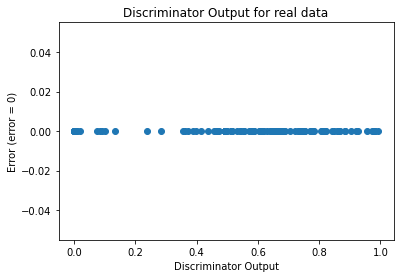

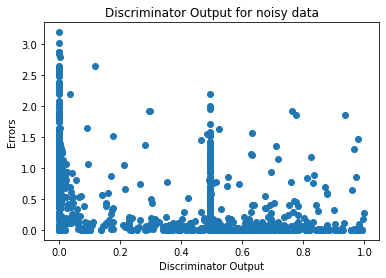

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)

# ABC - GAN Model with skip connection

In [14]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [15]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [16]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

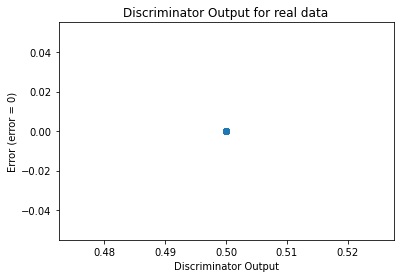

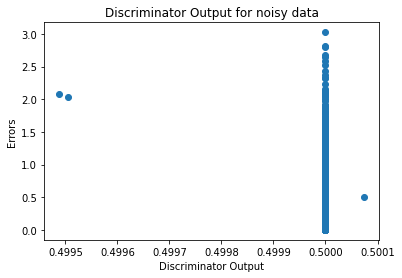

In [17]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [18]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0804]], device='cuda:0', requires_grad=True)
